# Developing Relative Strength Index (RSI) Trading Strategy

The Relative Strength Index (RSI) trading strategy is a popular momentum-based technical analysis approach used to identify overbought and oversold conditions in the market. The RSI is a momentum oscillator that measures the speed and change of price movements and ranges from 0 to 100.

The RSI trading strategy typically involves the following key components:

1. **RSI Calculation**: Calculate the RSI value based on historical price data. The RSI is usually calculated using a specific time period (commonly 14 periods) and compares the average gains to the average losses over that period.

2. **Overbought and Oversold Levels**: Define overbought and oversold levels for the RSI. Commonly, an RSI reading above 70 is considered overbought, indicating a potential reversal or pullback in price. Conversely, an RSI reading below 30 is considered oversold, suggesting a potential price rebound.

3. **Entry and Exit Signals**:
   - **Oversold Buy Signal**: When the RSI crosses above the oversold level (e.g., RSI > 30), it generates a buy signal, indicating that the asset may be undervalued, and there could be a potential price increase.
   - **Overbought Sell Signal**: When the RSI crosses below the overbought level (e.g., RSI < 70), it generates a sell signal, suggesting that the asset may be overvalued, and there could be a potential price decline.

4. **Confirmation**: To reduce false signals, traders often use additional indicators or price patterns to confirm RSI signals before executing trades. For example, traders may look for bullish or bearish candlestick patterns, moving average crossovers, or other technical indicators aligning with the RSI signals.

5. **Risk Management**: As with any trading strategy, risk management is crucial. Traders should use appropriate stop-loss and take-profit levels to protect their capital and lock in profits.

6. **Timeframe**: RSI trading strategies can be applied to various timeframes, from short-term intraday trading to longer-term swing trading or investing.

It's essential to remember that no trading strategy is foolproof, and the RSI strategy is no exception. It's essential to consider other factors, such as overall market conditions, news events, and fundamental analysis, along with technical indicators like the RSI, to make well-informed trading decisions.

Additionally, past performance does not guarantee future results, so backtesting and paper trading can help evaluate the effectiveness of the RSI trading strategy before implementing it with real money. As with any trading approach, continuous monitoring and adjustments may be necessary to adapt to changing market conditions.

## Step 1: Getting the Data

In this step, we utilize the pandas library to fetch data from the Wikipedia page titled 'List of S&P 500 companies'. The table on this page contains essential information about the S&P 500 companies, such as their ticker symbols, names, sectors, and industries.

After reading the HTML table from the Wikipedia page, we extract the ticker symbols and store them as a Python list called 'tickers'. We aim to use these ticker symbols to gather further financial data for each company.

To ensure consistency in formatting, we clean the ticker names by replacing any dots (.) with hyphens (-) using a list comprehension.

With the 'tickers' list containing the relevant ticker symbols, we are now ready to proceed to the next steps of our data analysis or algorithmic trading process.

In [14]:
# Import required libraries.
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Disable chained assignment warnings in pandas.
pd.options.mode.chained_assignment = None

In [ ]:
# Use pandas to read the HTML table from the Wikipedia page 'List_of_S&P_500_companies'.
# This table contains valuable data about the S&P 500 companies, including their ticker symbols, names, sectors, and industries.
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Select only the ticker symbols from the Wikipedia table and convert them to a Python list.
# The variable 'tickers' now contains a list of ticker symbols of the S&P 500 companies.
tickers = tickers.Symbol.to_list()

# Clean the ticker names by replacing any dots (.) in the tickers with hyphens (-).
# Some tickers might have dots in their names, and we want to ensure consistent formatting.
tickers = [i.replace('.', '-') for i in tickers]

# Remove the 'VNT' ticker from the list of tickers.
# This specific ticker is being removed from the list for a particular reason known to the developer.
tickers.pop(474)

# Remove the 'WRK' ticker from the list of tickers.
# Similarly, this ticker is being removed for a specific reason known to the developer.
tickers.pop(489)

# Step 2: RSI Trading Strategy Calculation

The provided Python function defines a step-by-step process for calculating the Relative Strength Index (RSI) trading strategy for a given asset using historical price data. The RSI is a momentum oscillator used to identify potential overbought and oversold conditions in an asset's price movement. Below is a summary of the steps:

1. **Data Retrieval**: The function utilizes the `yfinance` library to download historical price data for the specified asset starting from January 1, 2011.

2. **Moving Average (MA) Calculation**: It calculates the 200-day Moving Average (MA) for the adjusted closing prices and adds it as a new column labeled 'MA200'.

3. **Price Change Calculation**: The percentage price change from the previous day's closing price is computed and added as a new column called 'Price Change'.

4. **Upmove and Downmove Calculation**: New columns 'Upmove' and 'Downmove' are created to store the positive and negative price changes, respectively. The function uses lambda functions to set negative values to 0 for 'Upmove' and 'Downmove'.

5. **Exponential Moving Averages (EMA)**: The Exponential Moving Averages of 'Upmove' and 'Downmove' over a 19-day period are calculated and added as new columns labeled 'Avg Up' and 'Avg Down', respectively.

6. **Data Cleaning**: Rows with any missing values (NaN) resulting from the moving average calculations are dropped to ensure a clean dataset.

7. **Relative Strength (RS) Calculation**: The function calculates the Relative Strength (RS) as the ratio of 'Avg Up' to 'Avg Down' and adds it as a new column labeled 'RS'.

8. **RSI Calculation**: Using the RS value, the RSI is computed using the RSI formula and added as a new column labeled 'RSI'.

9. **Buy Signal Determination**: The function generates a 'Buy' signal based on the following conditions:
   - If the adjusted closing price is above the 200-day MA and the RSI is less than 30, a 'Buy' signal of 'Yes' is assigned.
   - Otherwise, if the adjusted closing price is below the 200-day MA or the RSI is greater than or equal to 30, a 'Buy' signal of 'No' is assigned.

10. **Output**: The function returns a DataFrame containing the calculated RSI values and 'Buy' signals, which can be further analyzed or used to make trading decisions.

This RSI trading strategy aims to identify potential entry points for buying an asset when it is undervalued (based on RSI being below 30) and the price is above the 200-day MA. As with any trading strategy, it is important to consider other factors and perform thorough analysis before making actual trading decisions.

In [29]:
# Define a function to calculate the Relative Strength Index (RSI) for a given asset.
def RSIcalc(asset):
    # Download historical price data for the asset starting from January 1, 2011, using yfinance library.
    df = yf.download(asset, start='2011-01-01')
    
    # Calculate the 200-day Moving Average (MA) for the adjusted closing prices and add it as a new column 'MA200'.
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    
    # Calculate the percentage price change from the previous day's closing price and add it as a new column 'Price Change'.
    df['Price Change'] = df['Adj Close'].pct_change()
    
    # Create new columns 'Upmove' and 'Downmove' to store the positive and negative price changes, respectively.
    # The lambda functions set negative values to 0 for 'Upmove' and 'Downmove'.
    df['Upmove'] = df['Price Change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
    
    # Calculate the Exponential Moving Averages (EMA) of 'Upmove' and 'Downmove' over a 19-day period.
    df['Avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['Avg Down'] = df['Downmove'].ewm(span=19).mean()
    
    # Drop rows with any missing values (NaN) resulting from the moving average calculations.
    df = df.dropna()
    
    # Calculate the Relative Strength (RS) as the ratio of 'Avg Up' to 'Avg Down'.
    df['RS'] = df['Avg Up'] / df['Avg Down']
    
    # Calculate the RSI using the RS value and apply the formula for RSI.
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100 / (x + 1)))
    
    # Determine the 'Buy' signal based on the conditions:
    # If the adjusted closing price is above the 200-day MA and the RSI is less than 30, set 'Buy' to 'Yes'.
    # Otherwise, set 'Buy' to 'No'.
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    
    # Return the DataFrame containing calculated values, including RSI and 'Buy' signals.
    return df

In [30]:
def getSignals(df):
    BuyingDates = []
    SellingDates = []
    
    for i in range(len(df)):
        if "Yes" in df ['Buy'].iloc[i]:
            BuyingDates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i+j] > 40:
                    SellingDates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    SellingDates.append(df.iloc[i+j+1].name)
                    
    return BuyingDates, SellingDates

In [32]:
frame = RSICalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


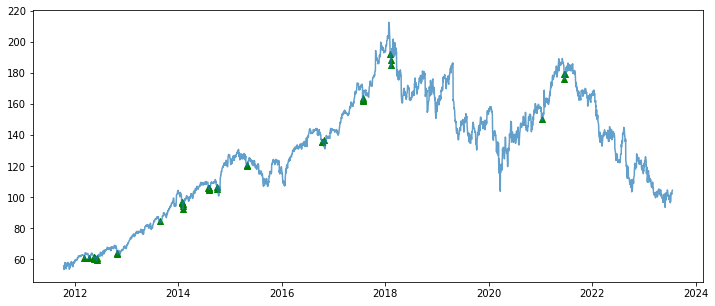

In [35]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [36]:
profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values) / frame.loc[buy].Open.values
profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925])

In [37]:
wins = [i for i in profits if i > 0]
len(wins)/len(profits)

0.825

In [38]:
len(profits)

40

In [40]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values) / frame.loc[buy].Open.values
    matrixsignals.append(profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

IndexError: single positional indexer is out-of-bounds

In [41]:
allprofit = []

for i in matrixprofits:
    for e in i:
        allprofit.append(e)

In [44]:
wins = [i for i in profits if i > 0]
len(wins)/len(profits)

0.9375

<function matplotlib.pyplot.show(close=None, block=None)>

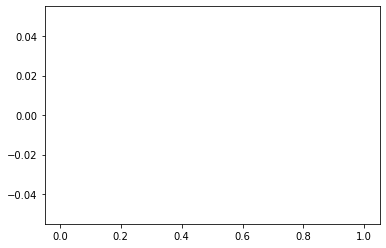

In [46]:
plt.hist(allprofit, bins=500)
plt.show